In [1]:
# from scipy import interp
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [2]:
from SFXGBoost.Model import SFXGBoost
import pickle
import pandas as pd
import numpy as np
from SFXGBoost.dataset.datasetRetrieval import getDataBase
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

Accuracy: 0.9333333333333333
Confusion Matrix:
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
ROC AUC (macro avg): 0.9966666666666667
ROC AUC (micro avg): 0.9966666666666667
F1 Score (macro avg): 0.9326599326599326
F1 Score (class 0): 1.0
F1 Score (class 1): 0.8888888888888888
F1 Score (class 2): 0.9090909090909091


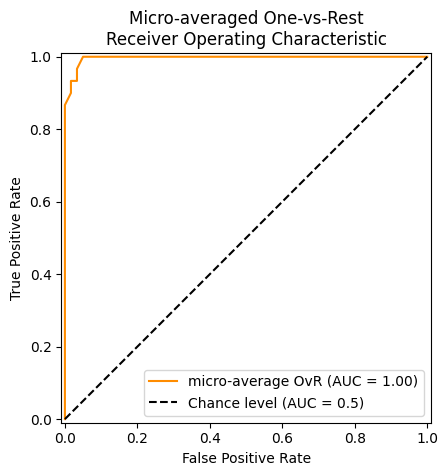

<Figure size 640x480 with 0 Axes>

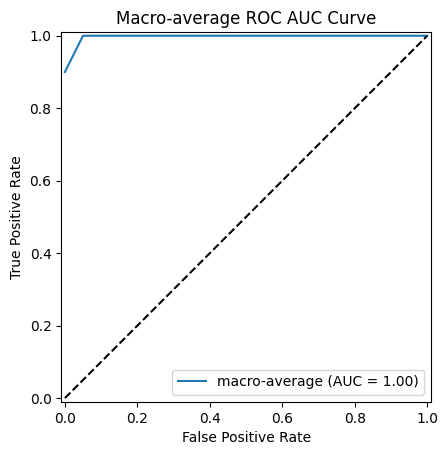

In [6]:


# from federboost import NUM_CLIENTS

# POSSIBLE_PATHS = ["e:\\oneDrive\\UOB\\Federated_XGBoost_Python-main\\data\\"]
# X_train, y_train, X_test, y_test, fName, X_shadow, y_shadow = getDataBase('healthcare', POSSIBLE_PATHS, False, 10_000)()

NUM_CLIENTS = 3

bst_clients = []
# E:\OneDrive\UOB\xgboost-comprehensive\FederBoost\Saves\Jun-24-2024\model_10_29_credit_card_fraud_1.pkl
for i in range(NUM_CLIENTS):
    i += 1
    bst:SFXGBoost = pickle.load(open(f"./Saves/Jun-26-2024/model_09_44_iris_{i}.pkl", 'rb'))
    bst_clients.append(bst)

X_train = np.concatenate([bst_clients[i].X_train for i in range(NUM_CLIENTS)])
X_test = np.concatenate([bst_clients[i].X_test for i in range(NUM_CLIENTS)])
y_train = np.concatenate([bst_clients[i].y_train for i in range(NUM_CLIENTS)])
y_test = np.concatenate([bst_clients[i].y_test for i in range(NUM_CLIENTS)])


n_classes = y_test.shape[1]
y_test_labels = np.argmax(y_test, axis=1)

y_pred = bst.predict(X_test)
y_pred_prab = bst.predict_proba(X_test)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='macro')
print(f"ROC AUC (macro avg): {roc_auc}")

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='micro')
print(f"ROC AUC (micro avg): {roc_auc}")

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred, average='macro')
print(f"F1 Score (macro avg): {f1}")

# Calculate F1 score for each class
f1_per_class = f1_score(y_test_labels, y_pred, average=None)
for i, score in enumerate(f1_per_class):
    print(f"F1 Score (class {i}): {score}")


display = RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred_prab.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prab[:, i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = roc_auc_score(y_test, y_pred_prab, average="macro", multi_class="ovr")

# Plot macro-average ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr["macro"], tpr=tpr["macro"], roc_auc=roc_auc["macro"], estimator_name='macro-average').plot()

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC AUC Curve')
plt.legend(loc="best")
plt.show()

# print(f'Macro-average ROC AUC: {roc_auc["macro"]}')

Accuracy: 0.9994734070563455
Confusion Matrix:
[[5684    3]
 [   0   10]]
ROC AUC (macro avg): 0.9997186565851943
ROC AUC (micro avg): 0.5378551956600436
F1 Score (macro avg): 0.9346506941762607
F1 Score (class 0): 0.9997361709612171
F1 Score (class 1): 0.8695652173913043


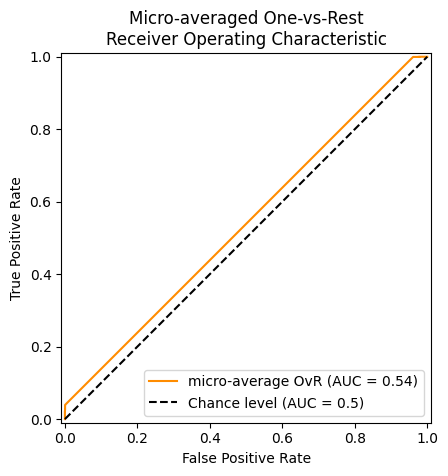

<Figure size 640x480 with 0 Axes>

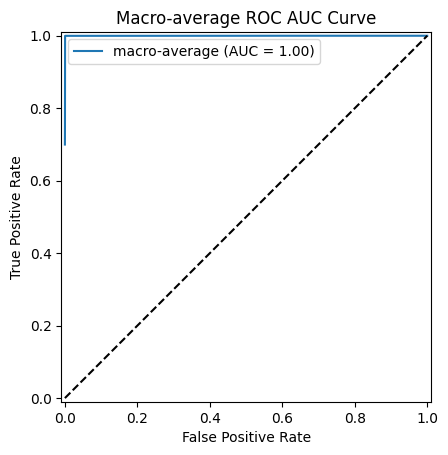

In [5]:
bst_clients = []
# E:\OneDrive\UOB\xgboost-comprehensive\FederBoost\Saves\Jun-24-2024\model_10_29_credit_card_fraud_1.pkl
for i in range(NUM_CLIENTS):
    i += 1
    bst:SFXGBoost = pickle.load(open(f"./Saves/Jun-25-2024/model_15_32_credit_card_fraud_{i}.pkl", 'rb'))
    bst_clients.append(bst)

X_train = np.concatenate([bst_clients[i].X_train for i in range(NUM_CLIENTS)])
X_test = np.concatenate([bst_clients[i].X_test for i in range(NUM_CLIENTS)])
y_train = np.concatenate([bst_clients[i].y_train for i in range(NUM_CLIENTS)])
y_test = np.concatenate([bst_clients[i].y_test for i in range(NUM_CLIENTS)])


n_classes = y_test.shape[1]
y_test_labels = np.argmax(y_test, axis=1)

y_pred = bst.predict(X_test)
y_pred_prab = bst.predict_proba(X_test)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='macro')
print(f"ROC AUC (macro avg): {roc_auc}")

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='micro')
print(f"ROC AUC (micro avg): {roc_auc}")

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred, average='macro')
print(f"F1 Score (macro avg): {f1}")

# Calculate F1 score for each class
f1_per_class = f1_score(y_test_labels, y_pred, average=None)
for i, score in enumerate(f1_per_class):
    print(f"F1 Score (class {i}): {score}")

# import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred_prab.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prab[:, i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = roc_auc_score(y_test, y_pred_prab, average="macro", multi_class="ovr")

# Plot macro-average ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr["macro"], tpr=tpr["macro"], roc_auc=roc_auc["macro"], estimator_name='macro-average').plot()

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC AUC Curve')
plt.legend(loc="best")
plt.show()

# print(f'Macro-average ROC AUC: {roc_auc["macro"]}')

Accuracy: 0.9666666666666667
Confusion Matrix:
[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
ROC AUC (macro avg): 1.0
ROC AUC (micro avg): 0.9994444444444445
F1 Score (macro avg): 0.9645191409897292
F1 Score (class 0): 1.0
F1 Score (class 1): 0.9523809523809523
F1 Score (class 2): 0.9411764705882353


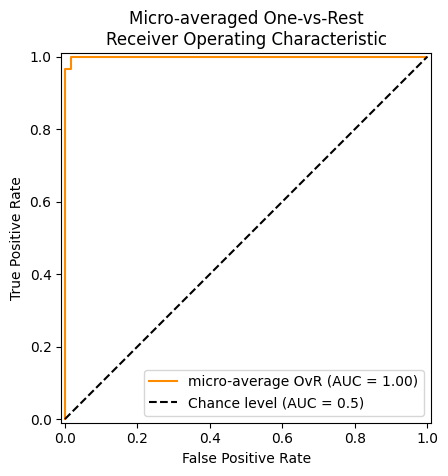

<Figure size 640x480 with 0 Axes>

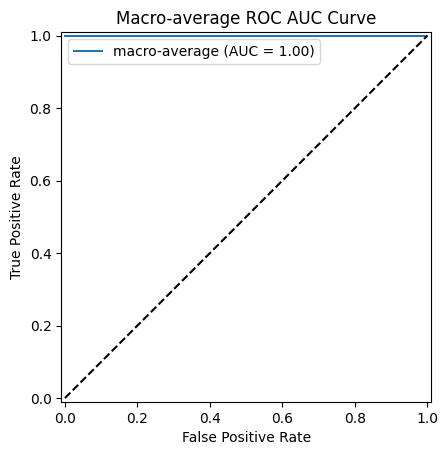

: 

In [25]:
from SFXGBoost.Model import SFXGBoost
import pickle
import pandas as pd
import numpy as np
from SFXGBoost.dataset.datasetRetrieval import getDataBase
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

# from federboost import NUM_CLIENTS

# POSSIBLE_PATHS = ["e:\\oneDrive\\UOB\\Federated_XGBoost_Python-main\\data\\"]
# X_train, y_train, X_test, y_test, fName, X_shadow, y_shadow = getDataBase('healthcare', POSSIBLE_PATHS, False, 10_000)()

NUM_CLIENTS = 2

bst_clients = []
# E:\OneDrive\UOB\xgboost-comprehensive\FederBoost\Saves\Jun-24-2024\model_10_29_credit_card_fraud_1.pkl
for i in range(NUM_CLIENTS):
    i += 1
    bst:SFXGBoost = pickle.load(open(f"./Saves/model_iris_{i}.pkl", 'rb'))
    bst_clients.append(bst)

X_train = np.concatenate([bst_clients[i].X_train for i in range(NUM_CLIENTS)])
X_test = np.concatenate([bst_clients[i].X_test for i in range(NUM_CLIENTS)])
y_train = np.concatenate([bst_clients[i].y_train for i in range(NUM_CLIENTS)])
y_test = np.concatenate([bst_clients[i].y_test for i in range(NUM_CLIENTS)])


n_classes = y_test.shape[1]
y_test_labels = np.argmax(y_test, axis=1)

y_pred = bst.predict(X_test)
y_pred_prab = bst.predict_proba(X_test)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='macro')
print(f"ROC AUC (macro avg): {roc_auc}")

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='micro')
print(f"ROC AUC (micro avg): {roc_auc}")

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred, average='macro')
print(f"F1 Score (macro avg): {f1}")

# Calculate F1 score for each class
f1_per_class = f1_score(y_test_labels, y_pred, average=None)
for i, score in enumerate(f1_per_class):
    print(f"F1 Score (class {i}): {score}")

import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred_prab.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prab[:, i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = roc_auc_score(y_test, y_pred_prab, average="macro", multi_class="ovr")

# Plot macro-average ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr["macro"], tpr=tpr["macro"], roc_auc=roc_auc["macro"], estimator_name='macro-average').plot()

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC AUC Curve')
plt.legend(loc="best")
plt.show()

# print(f'Macro-average ROC AUC: {roc_auc["macro"]}')

Accuracy: 0.7960199004975125
Confusion Matrix:
[[1900  287]
 [ 328  500]]
ROC AUC (macro avg): 0.8315761338961672
ROC AUC (micro avg): 0.8709278373197584
F1 Score (macro avg): 0.7399485990975039
F1 Score (class 0): 0.8607021517553793
F1 Score (class 1): 0.6191950464396285


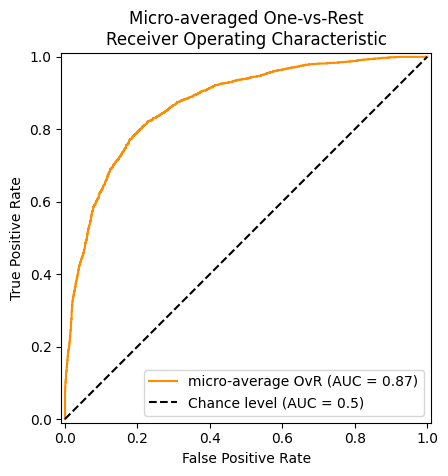

<Figure size 640x480 with 0 Axes>

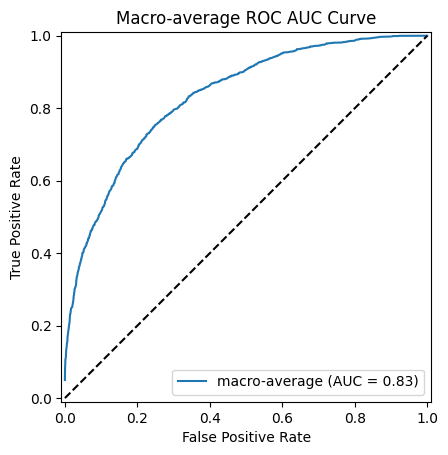

In [3]:
from SFXGBoost.Model import SFXGBoost
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

# from federboost import NUM_CLIENTS

# POSSIBLE_PATHS = ["e:\\oneDrive\\UOB\\Federated_XGBoost_Python-main\\data\\"]
# X_train, y_train, X_test, y_test, fName, X_shadow, y_shadow = getDataBase('healthcare', POSSIBLE_PATHS, False, 10_000)()

NUM_CLIENTS = 3

bst_clients = []
# E:\OneDrive\UOB\xgboost-comprehensive\FederBoost\Saves\Jun-24-2024\model_10_29_credit_card_fraud_1.pkl
for i in range(NUM_CLIENTS):
    i += 1
    bst:SFXGBoost = pickle.load(open(f"./Saves/Jun-26-2024/model_16_38_whales_prediction_{i}.pkl", 'rb'))
    bst_clients.append(bst)

X_train = np.concatenate([bst_clients[i].X_train for i in range(NUM_CLIENTS)])
X_test = np.concatenate([bst_clients[i].X_test for i in range(NUM_CLIENTS)])
y_train = np.concatenate([bst_clients[i].y_train for i in range(NUM_CLIENTS)])
y_test = np.concatenate([bst_clients[i].y_test for i in range(NUM_CLIENTS)])


n_classes = y_test.shape[1]
y_test_labels = np.argmax(y_test, axis=1)

y_pred = bst.predict(X_test)
y_pred_prab = bst.predict_proba(X_test)

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test_labels, y_pred)
print("Confusion Matrix:")
print(cm)

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='macro')
print(f"ROC AUC (macro avg): {roc_auc}")

roc_auc = roc_auc_score(y_test, y_pred_prab, multi_class='ovr', average='micro')
print(f"ROC AUC (micro avg): {roc_auc}")

# Calculate F1 score
f1 = f1_score(y_test_labels, y_pred, average='macro')
print(f"F1 Score (macro avg): {f1}")

# Calculate F1 score for each class
f1_per_class = f1_score(y_test_labels, y_pred, average=None)
for i, score in enumerate(f1_per_class):
    print(f"F1 Score (class {i}): {score}")



display = RocCurveDisplay.from_predictions(
    y_test.ravel(),
    y_pred_prab.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prab[:, i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = roc_auc_score(y_test, y_pred_prab, average="macro", multi_class="ovr")

# Plot macro-average ROC curve
plt.figure()
RocCurveDisplay(fpr=fpr["macro"], tpr=tpr["macro"], roc_auc=roc_auc["macro"], estimator_name='macro-average').plot()

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-average ROC AUC Curve')
plt.legend(loc="best")
plt.show()

# print(f'Macro-average ROC AUC: {roc_auc["macro"]}')